Saving users.csv to users (3).csv
Saving tags.csv to tags (3).csv
Saving photos.csv to photos (3).csv
Saving photo_tags.csv to photo_tags (3).csv
Saving likes.csv to likes (3).csv
Saving follows.csv to follows (3).csv
Saving comments.csv to comments (3).csv
Total Users: 100
Total Photos: 257
Total Likes: 8782
Total Comments: 7488
Total Tags: 21
Total Photo Tags: 501
Total Follows: 7623


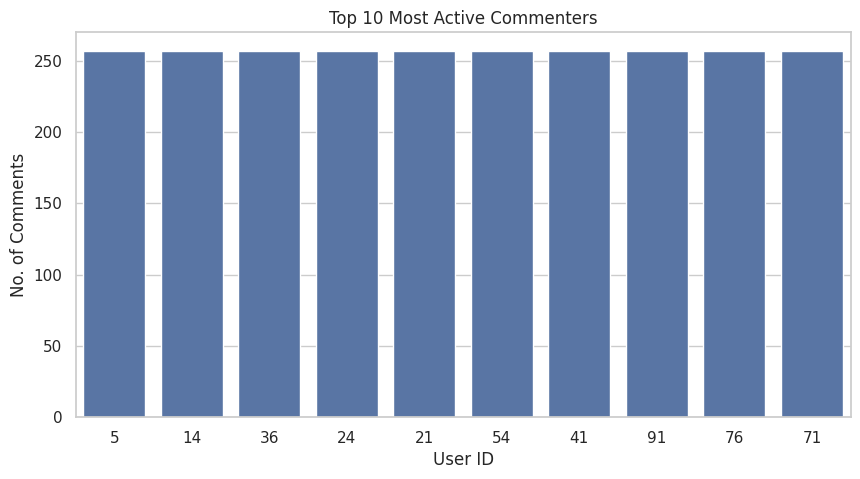

/tmp/ipython-input-263805553.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_per_photo.index.astype(str), y=likes_per_photo.values, palette="Blues_r")


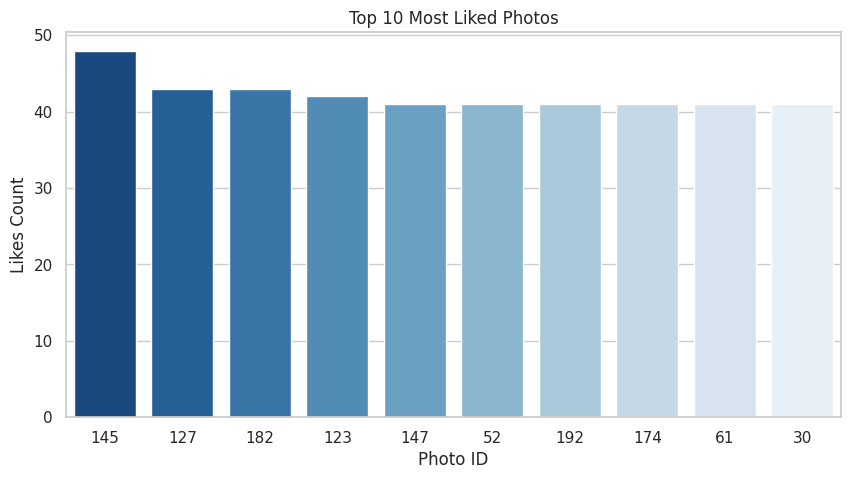

/tmp/ipython-input-263805553.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tag_names, y=photo_tag_counts.values, palette="Greens_r")


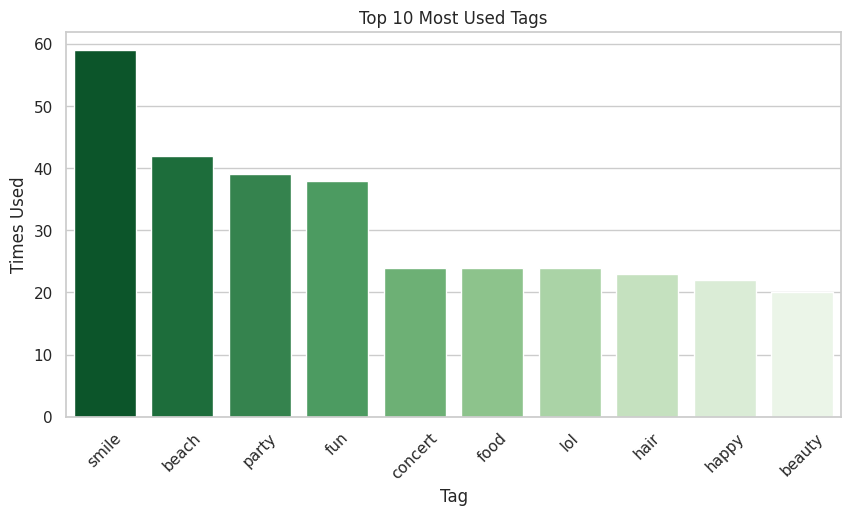

/tmp/ipython-input-263805553.py:77: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  comments['created_timestamp'] = pd.to_datetime(comments['created_timestamp'], errors='coerce')


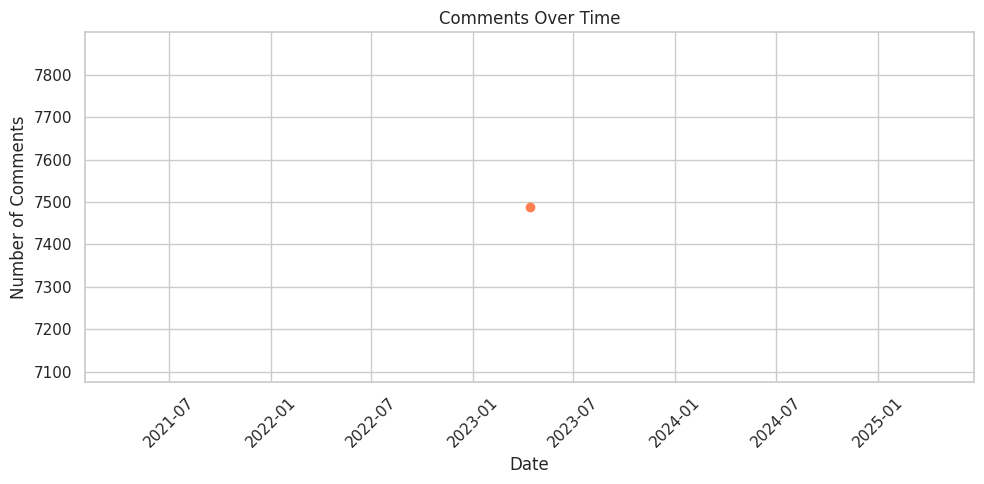

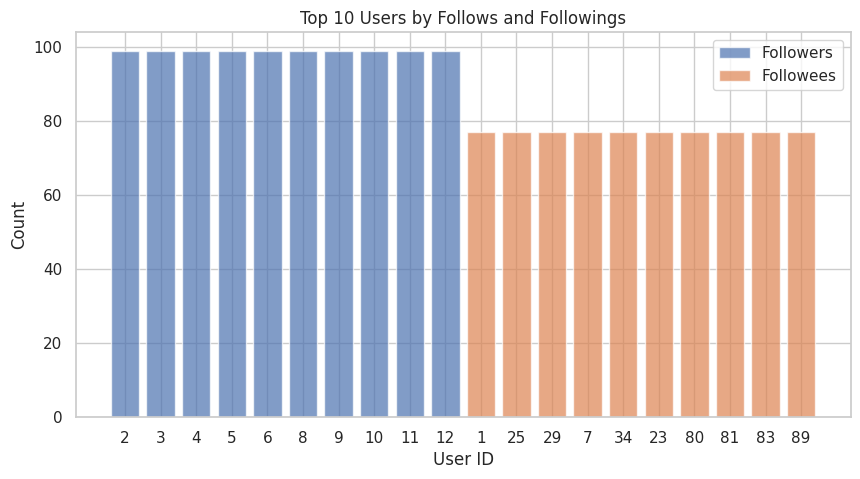

/tmp/ipython-input-263805553.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=photos_per_user.index.astype(str), y=photos_per_user.values, palette="mako")


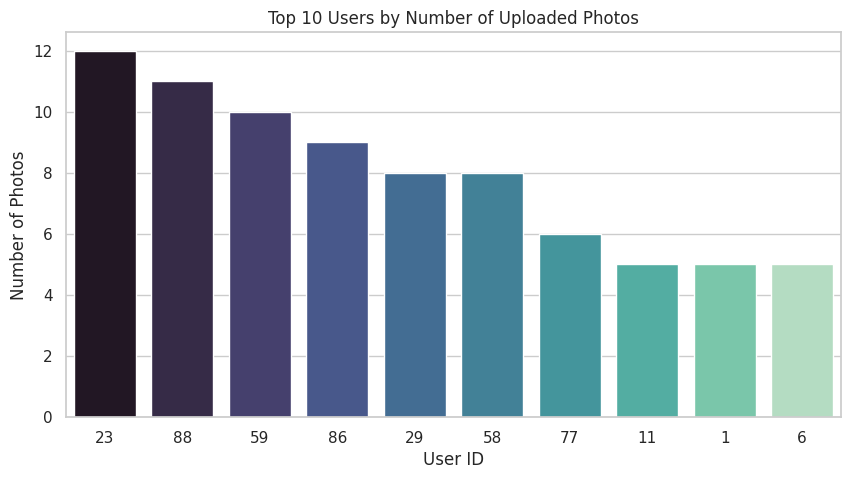

In [18]:
# ✅ STEP 1: IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# ✅ STEP 2: UPLOAD FILES
from google.colab import files
uploaded = files.upload()

# ✅ STEP 3: LOAD CSV FILES
comments = pd.read_csv("comments.csv")
users = pd.read_csv("users.csv")
tags = pd.read_csv("tags.csv")
photos = pd.read_csv("photos.csv")
photo_tags = pd.read_csv("photo_tags.csv")
likes = pd.read_csv("likes.csv")
follows = pd.read_csv("follows.csv")

# ✅ STEP 4: CLEAN COLUMN NAMES
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

comments = clean_columns(comments)
users = clean_columns(users)
tags = clean_columns(tags)
photos = clean_columns(photos)
photo_tags = clean_columns(photo_tags)
likes = clean_columns(likes)
follows = clean_columns(follows)

# ✅ STEP 5: RENAME SPECIFIC COLUMNS IF NEEDED
comments.rename(columns={'user__id': 'user_id'}, inplace=True)
photos.rename(columns={'created_dat': 'created_date'}, inplace=True)
tags.rename(columns={'tag_text': 'tag_name'}, inplace=True)  # <- your fix

# ✅ STEP 6: PRINT BASIC INFO
print("Total Users:", users.shape[0])
print("Total Photos:", photos.shape[0])
print("Total Likes:", likes.shape[0])
print("Total Comments:", comments.shape[0])
print("Total Tags:", tags.shape[0])
print("Total Photo Tags:", photo_tags.shape[0])
print("Total Follows:", follows.shape[0])

# ✅ STEP 7: TOP COMMENTERS
top_users = comments['user_id'].value_counts().head(10)
sns.barplot(x=top_users.index.astype(str), y=top_users.values)
plt.title("Top 10 Most Active Commenters")
plt.xlabel("User ID")
plt.ylabel("No. of Comments")
plt.show()

# ✅ STEP 8: MOST LIKED PHOTOS
likes_per_photo = likes['photo'].value_counts().head(10)
sns.barplot(x=likes_per_photo.index.astype(str), y=likes_per_photo.values, palette="Blues_r")
plt.title("Top 10 Most Liked Photos")
plt.xlabel("Photo ID")
plt.ylabel("Likes Count")
plt.show()

# ✅ STEP 9: MOST USED TAGS
photo_tag_counts = photo_tags['tag_id'].value_counts().head(10)
top_tag_names = tags.set_index('id').loc[photo_tag_counts.index]['tag_name']

sns.barplot(x=top_tag_names, y=photo_tag_counts.values, palette="Greens_r")
plt.title("Top 10 Most Used Tags")
plt.xticks(rotation=45)
plt.ylabel("Times Used")
plt.xlabel("Tag")
plt.show()

# ✅ STEP 10: COMMENTS OVER TIME
comments['created_timestamp'] = pd.to_datetime(comments['created_timestamp'], errors='coerce')
comments['date'] = comments['created_timestamp'].dt.date
daily_comments = comments['date'].value_counts().sort_index()
daily_comments.plot(marker='o', title="Comments Over Time", color='coral')
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ STEP 11: USER FOLLOW GRAPH
top_followers = follows['follower'].value_counts().head(10)
top_followees = follows['followee'].value_counts().head(10)

plt.bar(top_followers.index.astype(str), top_followers.values, label='Followers', alpha=0.7)
plt.bar(top_followees.index.astype(str), top_followees.values, label='Followees', alpha=0.7)
plt.title("Top 10 Users by Follows and Followings")
plt.xlabel("User ID")
plt.ylabel("Count")
plt.legend()
plt.show()

# ✅ STEP 12: PHOTO DISTRIBUTION PER USER
photos_per_user = photos['user_id'].value_counts().head(10)
sns.barplot(x=photos_per_user.index.astype(str), y=photos_per_user.values, palette="mako")
plt.title("Top 10 Users by Number of Uploaded Photos")
plt.xlabel("User ID")
plt.ylabel("Number of Photos")
plt.show()
